# I couldn't figure out how to get the graphs to come before the code snippets, so you have to scroll....

In [41]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # recommended import according to the docs
import warnings
warnings.filterwarnings('ignore')

In [2]:
def single_pick_test(r1,streak,threshold=0.5):
    '''Accept , current streak, and threshold to test,
    return fail or not (False=good), current max streak, and current streak
    (same as max)'''
    max_streak=streak
    if r1 <= threshold:
        #print "S first win",r1
        max_streak+=1
        fail=False
        #print fail,max_streak,max_streak
        return fail,max_streak,max_streak
    else:
        streak=0
        fail=True
        #print fail,max_streak,streak
        return fail,max_streak,0
    
def double_pick_test(r1,r2,streak,threshold=0.5):
    '''Accept , current streak, and threshold to test,
    return fail or not (False=good), current max streak, and current streak
    (same as max)'''
    max_streak=streak
    if r1 <= threshold:
        #print "D first win",r1
        if r2 <= threshold:
            #print "D second win",r2,threshold
            max_streak+=2
            fail=False
            return fail,max_streak,max_streak
        else:
            streak=0
            fail=True
            return fail,max_streak,0
    
    else:
        streak=0
        fail=True
        return fail,max_streak,0



Use this cell to get a feel for what I am showing, note: this is one random run only.

 
Threshold= 0.5
Max streak single pick per day: 6.0
Mean streak single pick per day: 1.08888888889
Days at or above 57: 0

Threshold= 0.5
Max streak two picks per day: 6.0
Mean streak two picks per day: 0.611111111111
Days at or above 57: 0
 
Threshold= 0.75
Max streak single pick per day: 30.0
Mean streak single pick per day: 4.86666666667
Days at or above 57: 0

Threshold= 0.75
Max streak two picks per day: 16.0
Mean streak two picks per day: 2.85555555556
Days at or above 57: 0
 
Threshold= 0.85
Max streak single pick per day: 18.0
Mean streak single pick per day: 3.76666666667
Days at or above 57: 0

Threshold= 0.85
Max streak two picks per day: 16.0
Mean streak two picks per day: 3.24444444444
Days at or above 57: 0
 
Threshold= 0.95
Max streak single pick per day: 55.0
Mean streak single pick per day: 18.6555555556
Days at or above 57: 0

Threshold= 0.95
Max streak two picks per day: 76.0
Mean streak two picks per day: 19.4111111111
Days at or above 57: 15


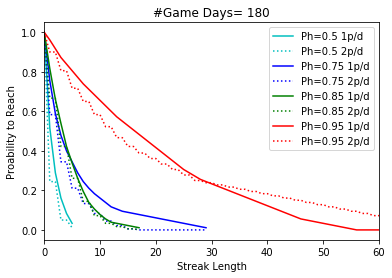

In [3]:
sample_size=180
threshold=0.7

colors=['c','b','g','r']
thresholds=[0.5,0.75,0.85,0.95]

daily_results_s = np.empty(sample_size);daily_results_s.fill(0)
daily_results_d = np.empty(sample_size);daily_results_d.fill(0)

current_streak_s = 0
current_streak_d = 0
max_streak_s=0
max_streak_d=0


random.seed(57)
for trial in range(len(thresholds)):
    threshold=thresholds[trial]
    current_streak_s = 0
    current_streak_d = 0
    max_streak_s=0
    max_streak_d=0
    daily_results_s = np.empty(sample_size);daily_results_s.fill(0)
    daily_results_d = np.empty(sample_size);daily_results_d.fill(0)
    
    for r in range(sample_size):
        r1=random.random()
        r2=random.random()
        
        result, max_streak_s, current_streak_s = single_pick_test(r1,current_streak_s,threshold=threshold)
        daily_results_s[r]=current_streak_s

        result, max_streak_d, current_streak_d=double_pick_test(r1,r2,current_streak_d,threshold=threshold)
        daily_results_d[r]=current_streak_d

    get_to_s = np.empty(sample_size);get_to_s.fill(0)
    get_to_d = np.empty(sample_size);get_to_d.fill(0)

    plot_min=int(min(np.min(daily_results_s),np.min(daily_results_d)))
    plot_max=int(max(np.max(daily_results_s),np.max(daily_results_d)))

    for results in range(plot_min,plot_max):
        get_to_s[results]=np.sum(daily_results_s >= results)
        get_to_d[results]=np.sum(daily_results_d >= results)

    x=range(0,plot_max)

    print ' '
    y_per_s=get_to_s/sample_size
    y_per_d=get_to_d/sample_size
    
    s_label="Ph="+str(threshold)+" 1p/d"
    d_label="Ph="+str(threshold)+" 2p/d"
    
    plt.plot(x,y_per_s[0:plot_max],color=colors[trial],label=s_label)
    plt.plot(x,y_per_d[0:plot_max],color=colors[trial],linestyle='dotted',label=d_label)
    plt.xlim(0,60)
    plt.xlabel("Streak Length")
    plt.ylabel("Proability to Reach")
    plt.legend(loc='best')

    title_string="#Game Days= "+str(sample_size)
    plt.title(title_string)


    print "Threshold=",threshold
    print "Max streak single pick per day:",np.max(daily_results_s)
    print "Mean streak single pick per day:",np.mean(daily_results_s)
    a=np.sum(daily_results_s>=57)
    print "Days at or above 57:", a
    print "\nThreshold=",threshold
    print "Max streak two picks per day:",np.max(daily_results_d)
    print "Mean streak two picks per day:",np.mean(daily_results_d)
    a=np.sum(daily_results_d>=57)
    print "Days at or above 57:", a
plt.show()
s_count=0
d_count=0

for i in range(sample_size):
    if daily_results_s[i] >=57:
        if daily_results_s[i+1]<57:
            s_count+=1
print ' '        
for i in range(sample_size):
    if daily_results_d[i] >=57:
        if daily_results_d[i+1]<57:
            d_count+=1

#print "\nOn",sample_size,"days:"
#print "Single daily choices yielded ",s_count," successful streaks"
#print "Two daily choices yielded ",d_count,"successful streaks"
#print ' '

While this graph looks wrong at first, but it isn't. The cross over is a function of the random seed I choce, which happened to be 57,  we can play with that for individula runs, but it won't matter on large runs.

I think longer term, we change threshold to whatever scoring function we come up with and use that.  

One note to Brian if you are reading, when I did this, I was thinking in terms of aggregating our thinking at the game level.  Over two too many beers last night, Clyde convinced me we should think about this on a per at bat level for several reasons. That should require only changing the sample size variable and maybe adding a game level loop.  Easy enough if we need it. 

Max streak two picks per day: 76.0
 
Max streak single pick per day: 68.0
 


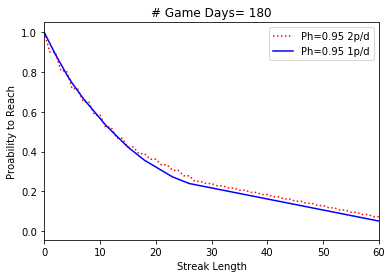

In [4]:
plt.close()

sample_size=180  # Currently equal to game days per year, estimate I didn't look it up
threshold=0.7  # Threshold is essentially Phit, setting default

colors=['c','b','g','r']
thresholds=[0.5,0.75,0.85,0.95]

daily_results_s = np.empty(sample_size);daily_results_s.fill(0)
daily_results_d = np.empty(sample_size);daily_results_d.fill(0)

current_streak_s = 0
current_streak_d = 0
max_streak_s=0
max_streak_d=0


random.seed(57)
for player_trials in range(3):  #Chose 3 because 3 =Clydeoz, Brian, Barry
    for trial in range(len(thresholds)):
        threshold=thresholds[trial]
        current_streak_s = 0
        current_streak_d = 0
        max_streak_s=0
        max_streak_d=0
        daily_results_s = np.empty(sample_size);daily_results_s.fill(0)
        daily_results_d = np.empty(sample_size);daily_results_d.fill(0)
    
        for r in range(sample_size):
            r1=random.random()
            r2=random.random()

            result, max_streak_s, current_streak_s = single_pick_test(r1,current_streak_s,threshold=threshold)
            daily_results_s[r]=current_streak_s

            result, max_streak_d, current_streak_d=double_pick_test(r1,r2,current_streak_d,threshold=threshold)
            daily_results_d[r]=current_streak_d

        get_to_s = np.empty(sample_size);get_to_s.fill(0)
        get_to_d = np.empty(sample_size);get_to_d.fill(0)

        plot_min=int(min(np.min(daily_results_s),np.min(daily_results_d)))
        plot_max=int(max(np.max(daily_results_s),np.max(daily_results_d)))

        for results in range(plot_min,plot_max):
            get_to_s[results]=np.sum(daily_results_s >= results)
            get_to_d[results]=np.sum(daily_results_d >= results)

        x=range(0,plot_max)



    max_streak_s = np.max(daily_results_s)
    max_streak_d = np.max(daily_results_d)
    
    s_label="Ph="+str(threshold)+" 1p/d"
    d_label="Ph="+str(threshold)+" 2p/d"
    y_per_s=get_to_s/sample_size
    y_per_d=get_to_d/sample_size
    
    if max_streak_s >= 57:
        print "Max streak single pick per day:",np.max(daily_results_s)
        a=np.sum(daily_results_s>=57)
        plt.plot(x,y_per_s[0:plot_max],color='b',label=s_label)
        
    if max_streak_d >= 57:   
        print "Max streak two picks per day:",np.max(daily_results_d)
        a=np.sum(daily_results_d>=57)
        plt.plot(x,y_per_d[0:plot_max],color='r',linestyle='dotted',label=d_label)
     
        print ' '

plt.xlim(0,60)
plt.xlabel("Streak Length")
plt.ylabel("Proability to Reach")
plt.legend(loc='best')

title_string="# Game Days= "+str(sample_size)
plt.title(title_string)

s_count=0
d_count=0

for i in range(sample_size):
    if daily_results_s[i] >=57:
        if daily_results_s[i+1]<57:
            s_count+=1
print ' '        
for i in range(sample_size):
    if daily_results_d[i] >=57:
        if daily_results_d[i+1]<57:
            d_count+=1
plt.show()


With a threshold of 0.950 and player trials set to 1000
 1 pick streak Median = 0.84 	 Max = 133
 2 pick streak Median = 0.85 	 Max = 82


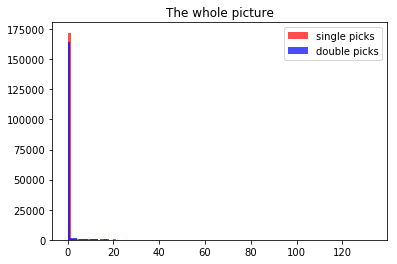

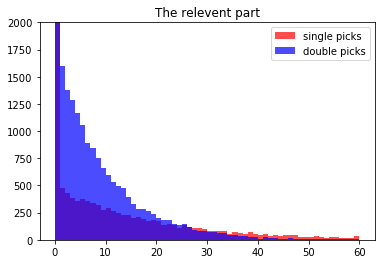

In [5]:
plt.close()

sample_size=180  # Currently equal to game days per year, estimate I didn't look it up
threshold=0.7  # Threshold is essentially Phit, setting default

colors=['c','b','g','r']
#thresholds=[0.5,0.75,0.85,0.95]
thresholds=[0.95]

daily_results_s = np.empty(sample_size);daily_results_s.fill(0)
daily_results_d = np.empty(sample_size);daily_results_d.fill(0)

current_streak_s = 0
current_streak_d = 0
max_streak_s=0
max_streak_d=0


random.seed(57)
ptrials=1000
streaks_s=np.empty(ptrials*sample_size)
streaks_d=np.empty(ptrials*sample_size)

count_s=0
count_d=0

num_trials=1000

for player_trials in range(num_trials):  #Choose 1000 to make the graph nice
                                #Chose 3 to equal one year Clydeoz, Brian, Barry
    for trial in range(len(thresholds)):
        threshold=thresholds[trial]
        current_streak_s = 0
        current_streak_d = 0
        max_streak_s=0
        max_streak_d=0
        daily_results_s = np.empty(sample_size);daily_results_s.fill(0)
        daily_results_d = np.empty(sample_size);daily_results_d.fill(0)
    
        for r in range(sample_size):
            r1=random.random()
            r2=random.random()

            result, max_streak_s, current_streak_s = single_pick_test(r1,current_streak_s,threshold=threshold)
            daily_results_s[r]=current_streak_s

            result, max_streak_d, current_streak_d=double_pick_test(r1,r2,current_streak_d,threshold=threshold)
            daily_results_d[r]=current_streak_d

        get_to_s = np.empty(sample_size);get_to_s.fill(0)
        get_to_d = np.empty(sample_size);get_to_d.fill(0)

        plot_min=int(min(np.min(daily_results_s),np.min(daily_results_d)))
        plot_max=int(max(np.max(daily_results_s),np.max(daily_results_d)))
        
        this_streak=0        
        for i in range(1,len(daily_results_s)):
            if daily_results_s[i] <= daily_results_s[i-1]:
                streaks_s[count_s]=this_streak
                count_s+=1
                this_streak=0
            else:
                this_streak+=1

        this_streak=0 
        for i in range(1,len(daily_results_d)):
            if daily_results_d[i] <= daily_results_d[i-1]:
                streaks_d[count_d]=this_streak
                count_d+=1
                this_streak=0
            else:
                this_streak+=1
                
print "With a threshold of %4.3f and player trials set to %d"%(threshold, num_trials)
print " 1 pick streak Median = %4.2f \t Max = %d" %(np.mean(streaks_s),np.max(streaks_s))
print " 2 pick streak Median = %4.2f \t Max = %d" %(np.mean(streaks_d),np.max(streaks_d))
bins=100
plt.hist(streaks_s,bins,color='r',alpha=.7,label='single picks')
plt.hist(streaks_d,bins,color='b',alpha=.7,label='double picks')
plt.title("The whole picture")
plt.legend(loc="best")
plt.show()
print ' '
chop=2000
bins=range(61)
plt.hist(streaks_s,bins,color='r',alpha=.7,label='single picks')
plt.hist(streaks_d,bins,color='b',alpha=.7,label='double picks')
plt.ylim(0,chop)
plt.title("The relevent part")
plt.legend(loc="best")
plt.show()
plt.close()
        

In [6]:
print streaks_s[0]

1.0


In [10]:
directory = "C:\\Users\\Bill\\baseballdatabank-2017.1\\core\\"
fname = directory+"batting.csv"

batting_df=pd.read_csv(fname)

In [11]:
batting_df.head(2)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN


In [34]:
dustin_df=batting_df.loc[batting_df.playerID == 'pedrodu01',:]
big_papi_df=batting_df.loc[batting_df.playerID == 'ortizda01',:]
jose_df=batting_df.loc[batting_df.playerID == 'altuvjo01',:]

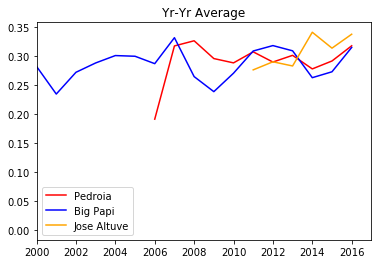

In [48]:
years=range(2000,2017)
dustin_df["avg"] = dustin_df.apply(lambda x: float(x['H'])/float(x['AB']),axis=1)
big_papi_df["avg"] = big_papi_df.apply(lambda x: float(x['H'])/float(x['AB']),axis=1)
jose_df["avg"] = jose_df.apply(lambda x: float(x['H'])/float(x['AB']),axis=1)
plt.plot(dustin_df.yearID,dustin_df.avg,color='r',label="Pedroia")
plt.plot(big_papi_df.yearID,big_papi_df.avg,color='b',label="Big Papi")
plt.plot(jose_df.yearID,jose_df.avg,color='orange',label="Jose Altuve")
plt.legend(loc="best")
plt.xlim(2000,2017)
plt.title("Yr-Yr Average")
plt.show()

In [7]:
from random import randint

combinations=[]

for i in range(3000000):
    s2=['m','i','s','s','i','s','s','i','p','p','i']
    choice=randint(0,9)
    l1=s2.pop(choice)
    choice=randint(0,8)
    l2=s2.pop(choice)
    choice=randint(0,7)
    l3=s2.pop(choice)
    result=l1+l2+l3
    combinations.append(result)
    
unique=set(combinations)
print len(unique)

53
